In [17]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re

In [20]:
# Load the dataset
data = pd.read_csv('cleaned_imdb_2024.csv')

In [22]:
data.head()

,Home_Page,Movie_Name,Genres,Overview,Cast,Original_Language,Storyline,Production_Company,Release_Date,Tagline,Vote_Average,Vote_Count,Budget_USD,Revenue_$,Run_Time_Minutes,Release_Country
0,https://www.imdb.com/title/tt5040012/,Nosferatu,"['Fantasy', 'Horror', 'Mystery']",A gothic tale of obsession between a haunted y...,"['Lily-Rose Depp', 'Nicholas Hoult', 'Bill Ska...","['English', 'German', 'Romanian', 'Russian']",A gothic tale of obsession between a haunted y...,"['Focus Features', 'Maiden Voyage Pictures', '...",2024-12-25,Succumb to the darkness.,7.3,151K,$50.0M,$176.0M,132,United States
1,https://www.imdb.com/title/tt20221436/,Emilia Pérez,"['Comedy', 'Crime', 'Drama', 'Musical', 'Thril...",Emilia Pérez follows three remarkable women in...,"['Zoe Saldaña', 'Karla Sofía Gascón', 'Selena ...","['Spanish', 'English']","In modern-day Mexico, overqualified and exploi...","['Why Not Productions', 'Page 114', 'Pathé']",2024-11-13,Not_Found,5.5,71K,$27.3M,$15.0M,132,United States
2,https://www.imdb.com/title/tt8999762/,The Brutalist,['Drama'],When a visionary architect and his wife flee p...,"['Adrien Brody', 'Felicity Jones', 'Guy Pearce...","['English', 'Hungarian', 'Italian', 'Hebrew', ...",When visionary architect László Toth and his w...,"['Brookstreet Pictures', 'Kaplan Morrison', 'I...",2025-01-24,Welcome to America.,7.9,28K,$10.0M,$31.1M,214,Canada
3,https://www.imdb.com/title/tt27657135/,Saturday Night,"['Biography', 'Comedy', 'Drama', 'History']","At 11:30pm on October 11th, 1975, a ferocious ...","['Gabriel LaBelle', 'Rachel Sennott', 'Cory Mi...",['English'],"At 11:30pm on October 11, 1975, a ferocious tr...","['Columbia Pictures', 'TSG Entertainment']",2024-10-11,"October 11, 1975, The First Saturday Night Liv...",7.0,26K,$25.0M,$10.0M,109,United States
4,https://www.imdb.com/title/tt17526714/,The Substance,"['Drama', 'Horror', 'Sci-Fi']",A fading celebrity takes a black-market drug: ...,"['Demi Moore', 'Margaret Qualley', 'Dennis Qua...",['English'],Have you ever dreamed of a better version of y...,"['Working Title Films', 'A Good Story', 'Black...",2024-09-20,"If you follow the instructions, what could go ...",7.3,249K,$17.5M,$77.0M,141,United States


# The dataset contains the following columns:

- Home_Page: URL link to the IMDB movie page
- Movie_Name: Title of the movie  
- Genres: List of genres for the movie
- Tagline: Movie tagline or promotional text
- Vote_Average: Average user rating
- Vote_Count: Number of user votes/ratings
- Budget_USD: Movie budget in USD
- Revenue_$: Movie revenue in USD
- Run_Time_Minutes: Duration of the movie in minutes
- Release_Country: Country where the movie was released


In [23]:
print(data.columns)
print(data.info())

Index(['Home_Page', 'Movie_Name', 'Genres', 'Overview', 'Cast',
       'Original_Language', 'Storyline', 'Production_Company', 'Release_Date',
       'Tagline', 'Vote_Average', 'Vote_Count', 'Budget_USD', 'Revenue_$',
       'Run_Time_Minutes', 'Release_Country'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Home_Page           501 non-null    object 
 1   Movie_Name          501 non-null    object 
 2   Genres              501 non-null    object 
 3   Overview            501 non-null    object 
 4   Cast                501 non-null    object 
 5   Original_Language   501 non-null    object 
 6   Storyline           501 non-null    object 
 7   Production_Company  501 non-null    object 
 8   Release_Date        501 non-null    object 
 9   Tagline             501 non-null    object 
 10  Vote_Average   

In [24]:
# Step 1: Handling Missing Values
# Identify columns with missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Home_Page             0
Movie_Name            0
Genres                0
Overview              0
Cast                  0
Original_Language     0
Storyline             0
Production_Company    0
Release_Date          0
Tagline               0
Vote_Average          0
Vote_Count            0
Budget_USD            0
Revenue_$             0
Run_Time_Minutes      0
Release_Country       0
dtype: int64


In [25]:
def parse_genres(genres):
    if isinstance(genres, str):
        return genres.split(',')
    elif isinstance(genres, list):
        return genres
    else:
        return []    

data['parsed_genres'] = data['Genres'].apply(parse_genres)   


In [26]:
def parse_original_language(original_language): 
    if isinstance(original_language, str):
        return original_language.split(',')
    elif isinstance(original_language, list):
        return original_language
    else:
        return []

data['parsed_original_language'] = data['Original_Language'].apply(parse_original_language)







In [27]:
#save ready data
data.to_csv('semantic_search_ready_imdb.csv', index=False)







In [28]:
data.head()

,Home_Page,Movie_Name,Genres,Overview,Cast,Original_Language,Storyline,Production_Company,Release_Date,Tagline,Vote_Average,Vote_Count,Budget_USD,Revenue_$,Run_Time_Minutes,Release_Country,parsed_genres,parsed_original_language
0,https://www.imdb.com/title/tt5040012/,Nosferatu,"['Fantasy', 'Horror', 'Mystery']",A gothic tale of obsession between a haunted y...,"['Lily-Rose Depp', 'Nicholas Hoult', 'Bill Ska...","['English', 'German', 'Romanian', 'Russian']",A gothic tale of obsession between a haunted y...,"['Focus Features', 'Maiden Voyage Pictures', '...",2024-12-25,Succumb to the darkness.,7.3,151K,$50.0M,$176.0M,132,United States,"[['Fantasy', 'Horror', 'Mystery']]","[['English', 'German', 'Romanian', 'Russian']]"
1,https://www.imdb.com/title/tt20221436/,Emilia Pérez,"['Comedy', 'Crime', 'Drama', 'Musical', 'Thril...",Emilia Pérez follows three remarkable women in...,"['Zoe Saldaña', 'Karla Sofía Gascón', 'Selena ...","['Spanish', 'English']","In modern-day Mexico, overqualified and exploi...","['Why Not Productions', 'Page 114', 'Pathé']",2024-11-13,Not_Found,5.5,71K,$27.3M,$15.0M,132,United States,"[['Comedy', 'Crime', 'Drama', 'Musical', '...","[['Spanish', 'English']]"
2,https://www.imdb.com/title/tt8999762/,The Brutalist,['Drama'],When a visionary architect and his wife flee p...,"['Adrien Brody', 'Felicity Jones', 'Guy Pearce...","['English', 'Hungarian', 'Italian', 'Hebrew', ...",When visionary architect László Toth and his w...,"['Brookstreet Pictures', 'Kaplan Morrison', 'I...",2025-01-24,Welcome to America.,7.9,28K,$10.0M,$31.1M,214,Canada,[['Drama']],"[['English', 'Hungarian', 'Italian', 'Hebre..."
3,https://www.imdb.com/title/tt27657135/,Saturday Night,"['Biography', 'Comedy', 'Drama', 'History']","At 11:30pm on October 11th, 1975, a ferocious ...","['Gabriel LaBelle', 'Rachel Sennott', 'Cory Mi...",['English'],"At 11:30pm on October 11, 1975, a ferocious tr...","['Columbia Pictures', 'TSG Entertainment']",2024-10-11,"October 11, 1975, The First Saturday Night Liv...",7.0,26K,$25.0M,$10.0M,109,United States,"[['Biography', 'Comedy', 'Drama', 'History']]",[['English']]
4,https://www.imdb.com/title/tt17526714/,The Substance,"['Drama', 'Horror', 'Sci-Fi']",A fading celebrity takes a black-market drug: ...,"['Demi Moore', 'Margaret Qualley', 'Dennis Qua...",['English'],Have you ever dreamed of a better version of y...,"['Working Title Films', 'A Good Story', 'Black...",2024-09-20,"If you follow the instructions, what could go ...",7.3,249K,$17.5M,$77.0M,141,United States,"[['Drama', 'Horror', 'Sci-Fi']]",[['English']]


Exploratory Data Analysis and Data Cleaning
#### Goal:
- Understand data distribution and quality.
- Identify patterns or trends  that might influence search relevance.
- Assess how different attributes correlate with each other, potentially guiding the semantic search algorithm.


In [30]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

Matplotlib is building the font cache; this may take a moment.


In [31]:
# Download necessary NLTK data
nltk.download('stopwords')

# Load the cleaned dataset
df = pd.read_csv('semantic_search_ready_imdb.csv')

# Basic dataset info
print(df.info())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abeni\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Home_Page                 501 non-null    object 
 1   Movie_Name                501 non-null    object 
 2   Genres                    501 non-null    object 
 3   Overview                  501 non-null    object 
 4   Cast                      501 non-null    object 
 5   Original_Language         501 non-null    object 
 6   Storyline                 501 non-null    object 
 7   Production_Company        501 non-null    object 
 8   Release_Date              501 non-null    object 
 9   Tagline                   501 non-null    object 
 10  Vote_Average              501 non-null    float64
 11  Vote_Count                501 non-null    object 
 12  Budget_USD                501 non-null    object 
 13  Revenue_$                 501 non-null    object 
 14  Run_Time_M

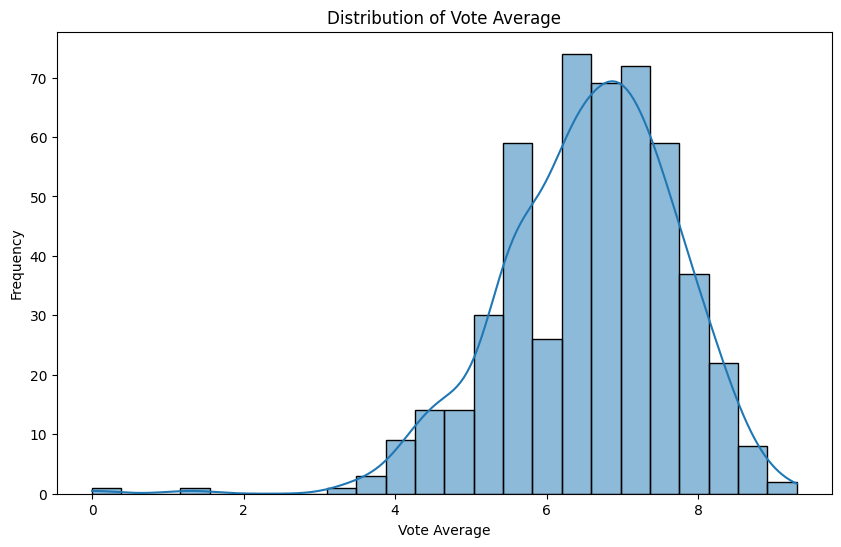

In [32]:
# Distribution of vote average
plt.figure(figsize=(10, 6))
sns.histplot(df['Vote_Average'], kde=True)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Number of Movies')

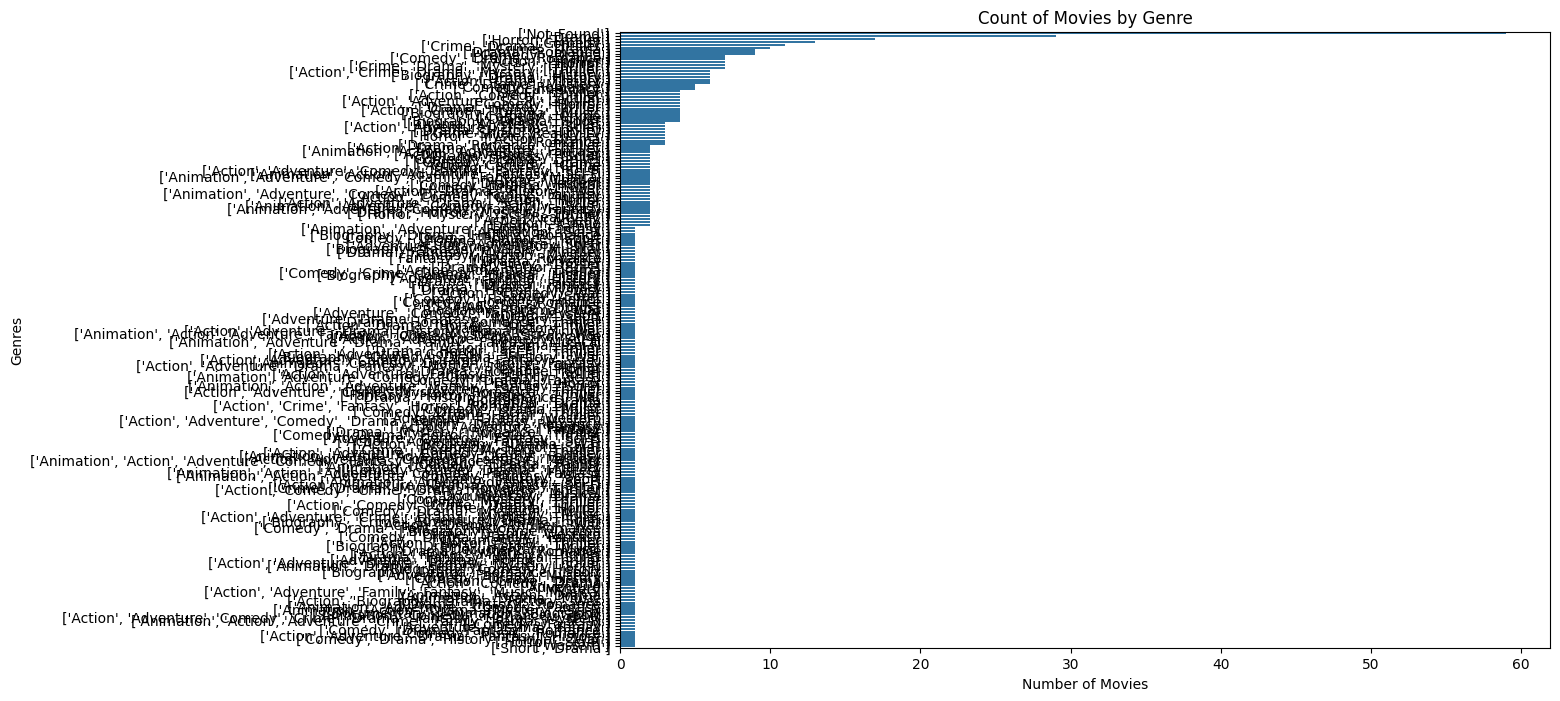

In [35]:
#analysis of genres
plt.figure(figsize=(12, 8))
sns.countplot(y='Genres', data=df, order=df['Genres'].value_counts().index)
plt.title('Count of Movies by Genre')
plt.xlabel('Number of Movies')



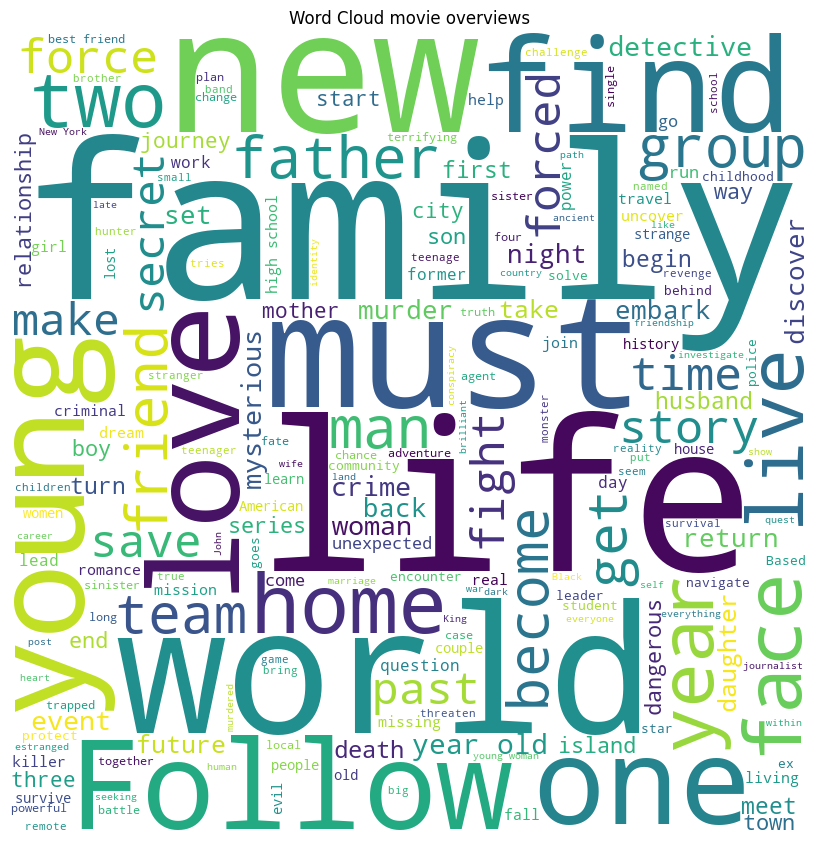

In [37]:
stop_words = set(stopwords.words('english'))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(' '.join(df['Overview'].astype(str)))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud movie overviews')
plt.show()

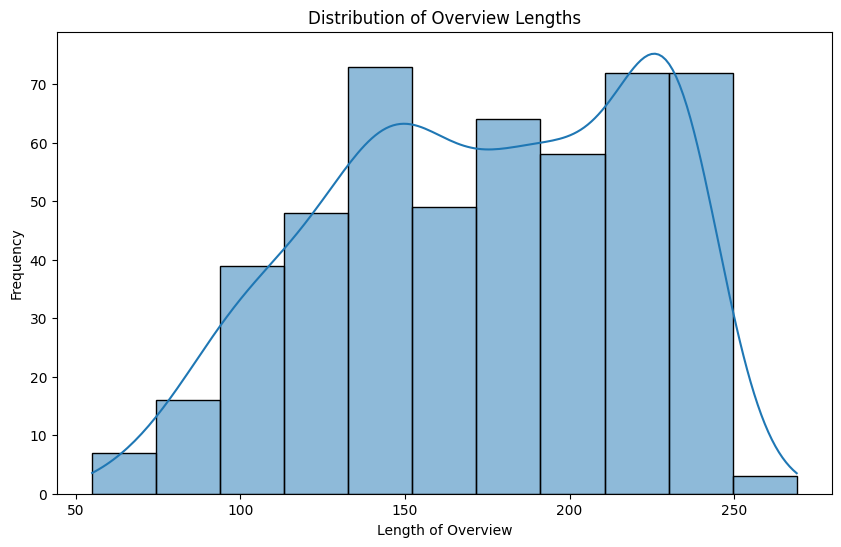

In [40]:
# Overview length analysis
df['Overview_length'] = df['Overview'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['Overview_length'], kde=True)
plt.title('Distribution of Overview Lengths')
plt.xlabel('Length of Overview')
plt.ylabel('Frequency')
plt.show()




#Insights from the exploaratory data analysis

Insights from the exploratory data analysis:

Based on the exploratory data analysis, several key insights emerge:

1. Genre Distribution:
   - The visualization shows varying popularity across different genres
   - Some movies are tagged with multiple genres, indicating genre hybridization
   - Drama appears to be one of the most common genres based on the bar chart

2. Overview Text Analysis:
   - The word cloud visualization effectively highlights key themes and plot elements
   - Words like "life", "family", and "world" appear prominently, suggesting these are common movie themes
   - Action and emotional terms are also frequently used in movie descriptions

3. Overview Length Distribution:
   - The histogram shows movie overviews typically range from around 300-800 characters
   - There is a clear right-skewed distribution with a peak around 500 characters
   - Some outlier movies have very long descriptions over 1000 characters
   - The KDE curve confirms the non-normal distribution pattern

